<a href="https://colab.research.google.com/github/victoraccete/seniorlabs-challenge/blob/main/SeniorLabs_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

Para ler o arquivo no Colab, salvei o arquivo com a codificação utf-8 antes de subir para o Colab.


In [92]:
texts = pd.read_csv("sms_senior.csv")
texts.head()

,Full_Text,got,great,wat,free,text,txt,win,already,dun,say,around,dont,think,back,hey,like,now,send,still,even,friends,per,call,claim,customer,prize,mobile,gonna,home,ive,soon,today,tonight,want,cash,reply,urgent,week,won,...,late,night,someone,guaranteed,service,buy,box,yet,youre,dear,life,people,cos,things,contact,last,went,sent,chat,gud,thk,keep,also,coming,every,told,sleep,care,mins,phone,number,wish,leave,thing,many,wan,Common_Word_Count,Word_Count,Date,IsSpam
0,Hey! Congrats 2u2. id luv 2 but ive had 2 go h...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,12,2017-01-01 00:08:00,no
1,"came to look at the flat, seems ok, in his 50s...",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,23,2017-01-01 00:19:00,no
2,Urgent! call 09061749602 from Landline. Your c...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,25,2017-01-01 01:53:00,yes
3,Do you hide anythiing or keeping distance from me,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,2017-01-01 02:14:00,no
4,"Actually, my mobile is full of msg. And i m do...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,29,2017-01-01 02:25:00,no


# Primeira etapa
## 1. Exibir gráfico as palavras mais frequentes em toda a base de dados (Ex.: gráfico de barras, nuvem de palavras, etc).


In [3]:
counts = pd.DataFrame(texts.sum())
counts.head()

,0
Full_Text,Hey! Congrats 2u2. id luv 2 but ive had 2 go h...
got,240
great,111
wat,96
free,278


In [4]:
counts = counts.drop(labels=["Full_Text", "Date", "Word_Count", "IsSpam", "Common_Word_Count"]).reset_index()
counts = counts.rename(columns={"index": "word", 0: "count"})
counts.head()

,word,count
0,got,240
1,great,111
2,wat,96
3,free,278
4,text,189


In [5]:
counts = counts.sort_values(by='count', ascending=False)
counts.head(10)

,word,count
22,call,581
16,now,479
57,can,405
87,get,390
42,will,383
60,just,368
11,dont,292
3,free,278
84,ltgt,276
67,know,257


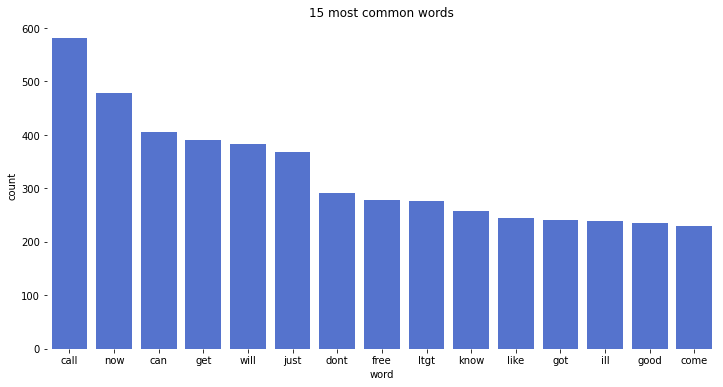

In [6]:
plt.figure(figsize=(12,6))
sns.barplot(x="word", y="count", data=counts.iloc[:15,:], color='royalblue')
sns.despine(left=True, bottom=True)
plt.title("15 most common words")
plt.show()

## 2. Exibir gráfico com as quantidades de mensagens comuns e spams para cada mês

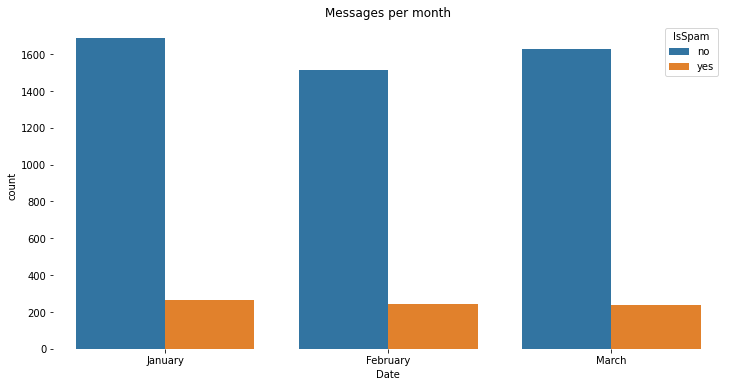

In [7]:
texts['Date'] = pd.to_datetime(texts['Date'])
monthly_count = texts.loc[:, ["Date", "IsSpam"]]
monthly_count['Date'] = monthly_count['Date'].dt.month_name()
plt.figure(figsize=(12,6))
sns.countplot(x="Date", hue="IsSpam", data=monthly_count)
sns.despine(left=True, bottom=True)
plt.title("Messages per month")
plt.show()

## 3. Calcular o máximo, o mínimo, a média, a mediana, o desvio padrão e a variância da quantidade total de palavras (Word_Count) para cada mês;

In [8]:
word_count = texts.loc[:, ["Date", "Word_Count"]]
word_count['Date'] = word_count['Date'].dt.month_name()
word_count

,Date,Word_Count
0,January,12
1,January,23
2,January,25
3,January,9
4,January,29
...,...,...
5569,March,22
5570,March,19
5571,March,27
5572,March,11


**Máximo:**

In [9]:
word_count.groupby(by="Date").max()

,Word_Count
Date,
February,100
January,190
March,115


**Mínimo:**

In [10]:
word_count.groupby(by="Date").min()

,Word_Count
Date,
February,2
January,2
March,2


**Média:**

In [11]:
word_count.groupby(by="Date").mean()

,Word_Count
Date,
February,16.029043
January,16.336918
March,16.285255


**Mediana:**

In [12]:
word_count.groupby(by="Date").median()

,Word_Count
Date,
February,13.0
January,13.0
March,12.0


**Desvio padrão:**

In [13]:
word_count.groupby(by="Date").std()

,Word_Count
Date,
February,11.042459
January,12.557171
March,11.576213


**Variância:**

In [14]:
word_count.groupby(by="Date").var()

,Word_Count
Date,
February,121.935908
January,157.682535
March,134.008715


**Total:**

In [15]:
word_count.groupby(by="Date").sum()

,Word_Count
Date,
February,28147
January,31906
March,30372


## 4. Exibir o dia de cada mês que possui a maior sequência de mensagens comuns (não spam).


Como é pedido uma **sequência**, vamos ordenar os dados pela data, caso já não esteja ordenado. 

In [22]:
texts["Date"] = pd.to_datetime(texts["Date"])
texts = texts.sort_values(by="Date")
sequences = texts.loc[:, ["Date", "IsSpam"]]
sequences

,Date,IsSpam
0,2017-01-01 00:08:00,no
1,2017-01-01 00:19:00,no
2,2017-01-01 01:53:00,yes
3,2017-01-01 02:14:00,no
4,2017-01-01 02:25:00,no
...,...,...
5569,2017-03-31 21:13:00,no
5570,2017-03-31 22:19:00,no
5571,2017-03-31 23:15:00,yes
5572,2017-03-31 23:32:00,no


In [26]:
seq_jan = sequences[sequences.Date.dt.month == 1]
seq_jan

,Date,IsSpam
0,2017-01-01 00:08:00,no
1,2017-01-01 00:19:00,no
2,2017-01-01 01:53:00,yes
3,2017-01-01 02:14:00,no
4,2017-01-01 02:25:00,no
...,...,...
1948,2017-01-31 21:44:00,no
1949,2017-01-31 21:58:00,no
1950,2017-01-31 22:23:00,no
1951,2017-01-31 23:18:00,no


In [27]:
seq_feb = sequences[sequences.Date.dt.month == 2]
seq_feb

,Date,IsSpam
1953,2017-02-01 00:56:00,no
1954,2017-02-01 01:13:00,no
1955,2017-02-01 01:24:00,no
1956,2017-02-01 01:26:00,no
1957,2017-02-01 02:22:00,no
...,...,...
3704,2017-02-28 22:00:00,no
3705,2017-02-28 22:14:00,no
3706,2017-02-28 22:25:00,no
3707,2017-02-28 23:41:00,no


In [45]:
seq_mar = sequences[sequences.Date.dt.month == 3]
seq_mar

,Date,IsSpam
3709,2017-03-01 00:43:00,no
3710,2017-03-01 00:55:00,no
3711,2017-03-01 02:23:00,no
3712,2017-03-01 02:28:00,yes
3713,2017-03-01 02:33:00,no
...,...,...
5569,2017-03-31 21:13:00,no
5570,2017-03-31 22:19:00,no
5571,2017-03-31 23:15:00,yes
5572,2017-03-31 23:32:00,no


In [42]:
def count_sequence(df):
    largest_sequence = 0
    day = 0
    for i in range(1, 32):
        current_sequence = 0
        day_subset = df[df.Date.dt.day == i]
        # if df is empty, means the current day does not have any texts in it 
        if day_subset.empty:
            continue
        else:
            for msg in day_subset.iterrows():
                if msg[1].IsSpam == "no":
                    current_sequence += 1
                    if current_sequence > largest_sequence:
                        largest_sequence = current_sequence
                        day = i
                else:
                    current_sequence = 0
    return largest_sequence, day



In [47]:
sequence, day = count_sequence(seq_jan)
print(f"Largest sequence in January was {sequence} in day {day}")

Largest sequence in January was 31 in day 26


In [48]:
sequence, day = count_sequence(seq_feb)
print(f"Largest sequence in February was {sequence} in day {day}")

Largest sequence in February was 39 in day 4


In [46]:
sequence, day = count_sequence(seq_mar)
print(f"Largest sequence in March was {sequence} in day {day}")

Largest sequence in March was 46 in day 31


# Segunda etapa


Separando os dados de treinamento e de teste. 

In [110]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [97]:
texts = pd.read_csv("sms_senior.csv")
texts['IsSpam'] = texts['IsSpam'].map({"yes": 1, "no": 0})
train, test = train_test_split(shuffle(texts), test_size=0.2)
X_train = train.iloc[:,1:-4]
y_train = train.iloc[:, -1]
X_train

,got,great,wat,free,text,txt,win,already,dun,say,around,dont,think,back,hey,like,now,send,still,even,friends,per,call,claim,customer,prize,mobile,gonna,home,ive,soon,today,tonight,want,cash,reply,urgent,week,won,help,...,waiting,much,stop,one,late,night,someone,guaranteed,service,buy,box,yet,youre,dear,life,people,cos,things,contact,last,went,sent,chat,gud,thk,keep,also,coming,every,told,sleep,care,mins,phone,number,wish,leave,thing,many,wan
1615,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
844,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
185,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
820,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3357,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5110,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5033,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1736,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5043,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [98]:
y_train

1615    0
844     0
185     0
820     0
3357    0
       ..
5110    1
5033    0
1736    0
5043    1
4437    0
Name: IsSpam, Length: 4459, dtype: int64

In [99]:
X_test = test.iloc[:,1:-4]
y_test = test.iloc[:, -1]
X_test

,got,great,wat,free,text,txt,win,already,dun,say,around,dont,think,back,hey,like,now,send,still,even,friends,per,call,claim,customer,prize,mobile,gonna,home,ive,soon,today,tonight,want,cash,reply,urgent,week,won,help,...,waiting,much,stop,one,late,night,someone,guaranteed,service,buy,box,yet,youre,dear,life,people,cos,things,contact,last,went,sent,chat,gud,thk,keep,also,coming,every,told,sleep,care,mins,phone,number,wish,leave,thing,many,wan
145,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2194,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5233,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3236,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5321,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3189,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5302,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Treinando o modelo (Naive Bayes)

In [100]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train , y_train)

preds = naive_bayes.predict(X_test)
preds

array([1, 0, 0, ..., 0, 0, 0])

Checando os resultados.

In [106]:
print(f"Accuracy: {accuracy_score(preds, y_test)}")
print(f"Precision: {precision_score(preds, y_test)}")
print(f"F1: {f1_score(preds, y_test)}")

Accuracy: 0.9506726457399103
Precision: 0.7960526315789473
F1: 0.8148148148148148


A acurácia ficou interessante, mas talvez, para este tipo de problema, o melhor seria reduzir a quantidade de falsos positivos, então seria melhor usar a precisão. 

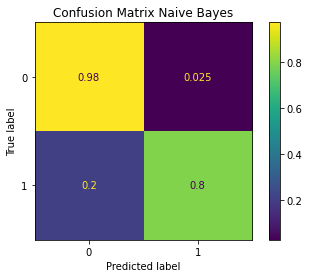

In [116]:
cm = confusion_matrix(y_test, preds, labels=naive_bayes.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=naive_bayes.classes_)
disp.plot()
plt.title("Confusion Matrix Naive Bayes")
plt.show()

Treinando o modelo (SVC)

In [118]:
# which kernel? 
# https://www.svm-tutorial.com/2014/10/svm-linear-kernel-good-text-classification/
svc = svm.SVC(kernel='linear', C=1.0) # I tried different C values, but they didn't present
                                      # any noticeable improvement, so I kept it in 1.0 (default)
svc.fit(X_train , y_train)

preds = svc.predict(X_test)
preds

array([0, 0, 0, ..., 0, 0, 0])

Checando os resultados.

In [119]:
print(f"Accuracy: {accuracy_score(preds, y_test)}")
print(f"Precision: {precision_score(preds, y_test)}")
print(f"F1: {f1_score(preds, y_test)}")

Accuracy: 0.9605381165919282
Precision: 0.7697368421052632
F1: 0.8417266187050361


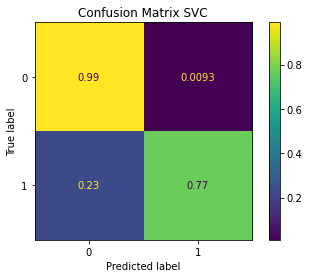

In [120]:
cm = confusion_matrix(y_test, preds, labels=svc.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()
plt.title("Confusion Matrix SVC")
plt.show()